In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import scipy as sp
from scipy import ndimage

In [2]:
IMG_DEFAULT1 = "../static/bl2049_small.jpg"
IMG_DEFAULT2 = "../static/captcha.jpg"
IMG_DEFAULT3 = "../static/bird_small.jpg"
IMG_DEFAULT4 = "../static/bp.jpg"
IMG_DEFAULT5 = "../static/captcha2.jpg"
IMG_DEFAULT6 = "../static/bs_small.jpg"

In [3]:
def get_bin_img(source=IMG_DEFAULT1):
    img = cv2.imread(source)
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, b_img = cv2.threshold(g_img,0,255,cv2.THRESH_OTSU)
    return b_img

In [4]:
b_img1 = get_bin_img(source=IMG_DEFAULT1)
img1 = cv2.imread(IMG_DEFAULT1)
b_img2 = get_bin_img(source=IMG_DEFAULT2)
b_img3 = get_bin_img(source=IMG_DEFAULT3)
b_img4 = get_bin_img(source=IMG_DEFAULT4)
b_img5 = get_bin_img(source=IMG_DEFAULT5)
b_img6 = get_bin_img(source=IMG_DEFAULT6)


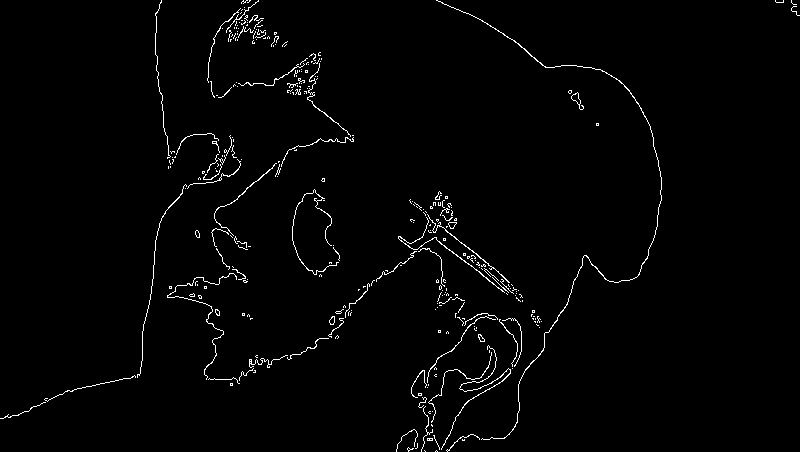

In [5]:
r1=cv2.Canny(b_img1, 50, 150)
display(Image.fromarray(cv2.Canny(b_img1, 50, 150)))

In [6]:
def detect_Roberts(b_img1):
    roberts_cross_v = np.array( [[1, 0 ],
                                [0,-1 ]] )
    
    roberts_cross_h = np.array( [[ 0, 1 ],
                                [ -1, 0 ]] )
    
    img = b_img1.astype('float64')
    vertical = ndimage.convolve( img, roberts_cross_v )
    horizontal = ndimage.convolve( img, roberts_cross_h )

    edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
    return edged_img

In [7]:
r = detect_Roberts(b_img1)

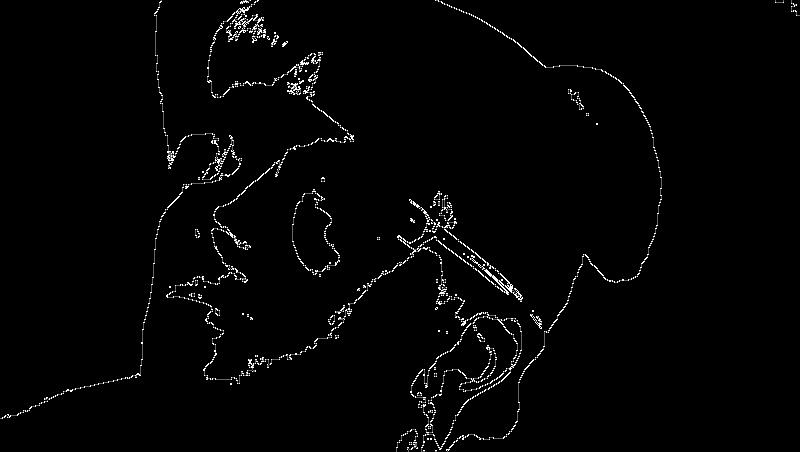

In [8]:
display(Image.fromarray(r.astype('uint8')))

In [9]:
def detect_Prewitt(b_img):
    conv_x = np.array( [[1, 0, -1],
                        [1, 0, -1 ],
                        [1, 0, -1 ]] )
    
    conv_y = np.array( [[1, 1, 1],
                        [0, 0, 0],
                        [-1, -1, -1]] )
    
    img = b_img.astype('float64')
    vertical = ndimage.convolve( img, conv_x )
    horizontal = ndimage.convolve( img, conv_y )

    edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
    return edged_img.astype('uint8')

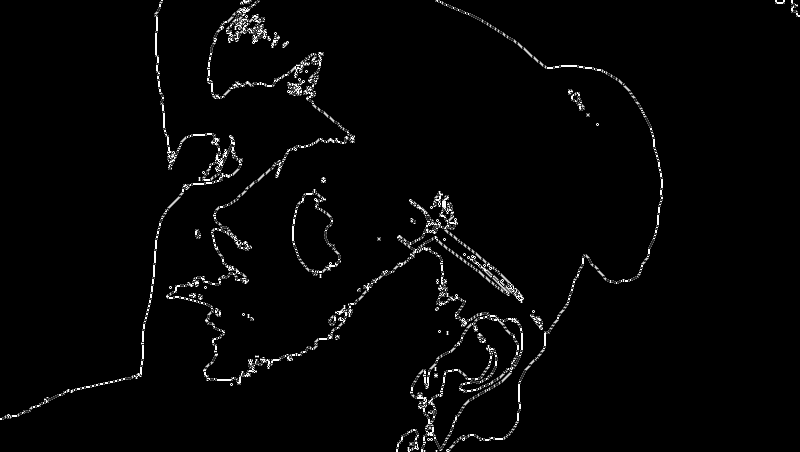

In [10]:
display(Image.fromarray(detect_Prewitt(b_img1)))

In [11]:
def detect_Sobel(b_img):
    conv_x = np.array( [[1, 0, -1],
                        [2, 0, -2 ],
                        [1, 0, -1 ]] )
    
    conv_y = np.array( [[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]] )
    
    img = b_img.astype('float64')
    vertical = ndimage.convolve( img, conv_x )
    horizontal = ndimage.convolve( img, conv_y )

    edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
    return edged_img.astype('uint8')

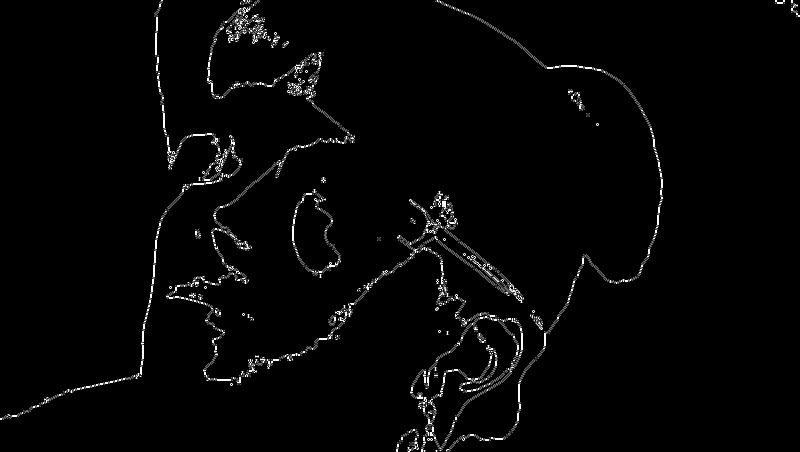

In [12]:
display(Image.fromarray(detect_Sobel(b_img1)))

In [13]:
def detect_Scharr(b_img):
    conv_x = np.array( [[3, 0, -3],
                        [10, 0, -10 ],
                        [3, 0, -3 ]] )
    
    conv_y = np.array( [[3, 10, 3],
                        [0, 0, 0],
                        [-3, -10, -3]] )
    
    img = b_img.astype('float64')
    vertical = ndimage.convolve( img, conv_x )
    horizontal = ndimage.convolve( img, conv_y )

    edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
    return edged_img.astype('uint8')

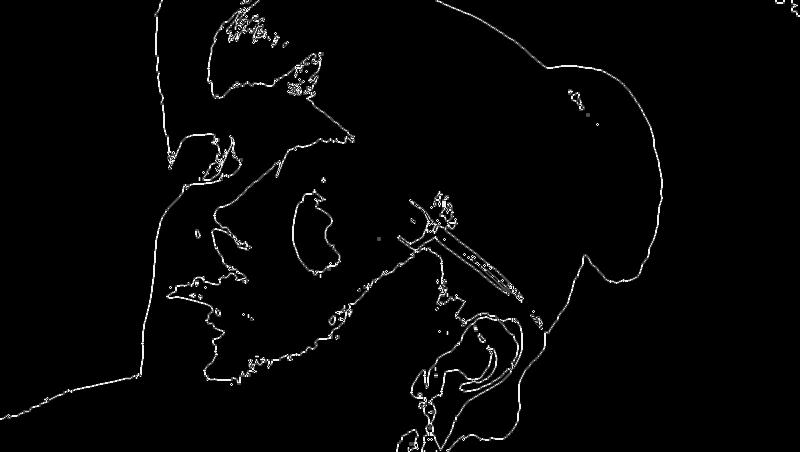

In [14]:
display(Image.fromarray(detect_Scharr(b_img1)))

In [15]:
def detect_Laplace(b_img):
    ddepth = cv2.CV_16S
    kernel_size = 3

    b_img = cv2.GaussianBlur(b_img, (3, 3), 0)
    
    res = cv2.Laplacian(b_img, ddepth, ksize=kernel_size)
    res = cv2.convertScaleAbs(res)
    return res.astype('uint8')

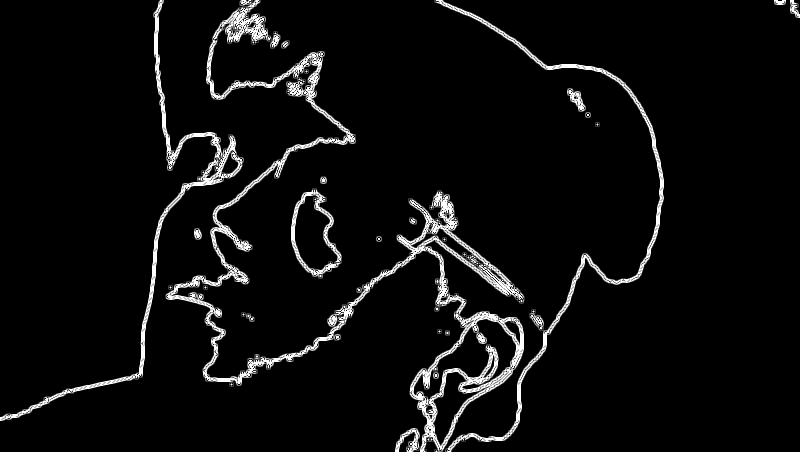

In [16]:
display(Image.fromarray(detect_Laplace(b_img1)))

In [17]:
def detect_Laplace2(img):
    LoG = ndimage.gaussian_laplace(img , 2)
    thres = np.absolute(LoG).mean() * 0.75
    output = sp.zeros(LoG.shape)
    w = output.shape[1]
    h = output.shape[0]

    for y in range(1, h - 1):
        for x in range(1, w - 1):
            patch = LoG[y-1:y+2, x-1:x+2]
            p = LoG[y, x]
            maxP = patch.max()
            minP = patch.min()
            if (p > 0):
                zeroCross = True if minP < 0 else False
            else:
                zeroCross = True if maxP > 0 else False
            if ((maxP - minP) > thres) and zeroCross:
                output[y, x] = 1

    plt.imshow(output)
    plt.show()
    return output.astype('uint8')

C:\Users\igors\AppData\Local\Temp\ipykernel_29000\402273843.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  output = sp.zeros(LoG.shape)


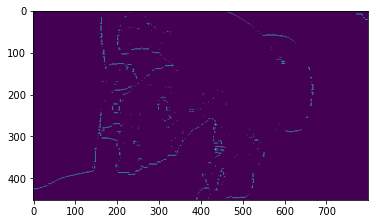

In [18]:
r = detect_Laplace2(b_img1)

In [19]:
r

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

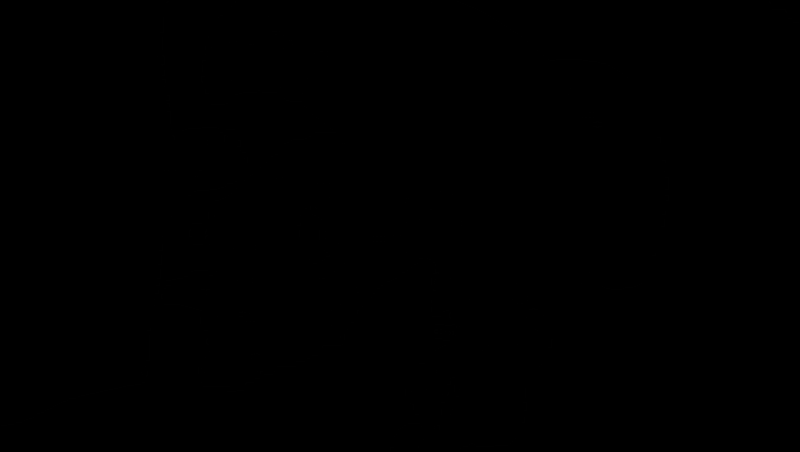

In [20]:
display(Image.fromarray(r))

In [21]:
def detect_Laplace3(b_img):
    conv_x = np.array([[1, 1, 1],
                      [1, -8, 1],
                      [1, 1, 1]] )
    conv_y = np.array( [[1, 1, 1],
                      [1, -8, 1],
                      [1, 1, 1]] )
    
    
    b_img = cv2.GaussianBlur(b_img, (3, 3), 0)
    
    img = b_img.astype('float64')
    vertical = ndimage.convolve(img, conv_x)
    horizontal = ndimage.convolve(img, conv_y)

    edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))

    return edged_img.astype('uint8')

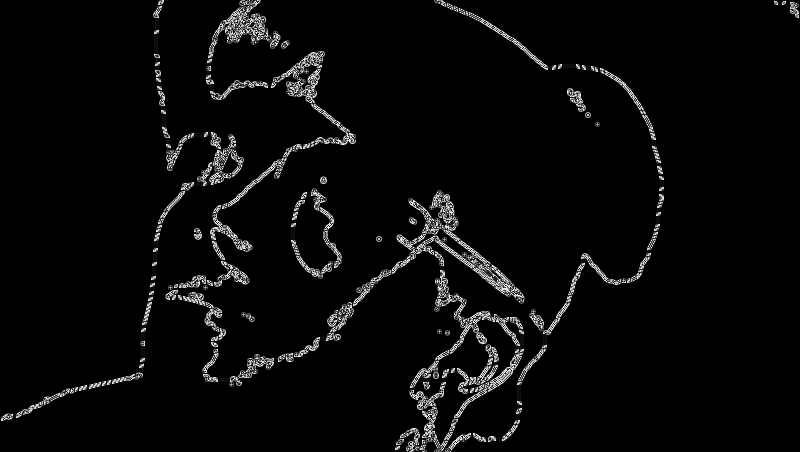

In [22]:
display(Image.fromarray(detect_Laplace3(b_img1)))

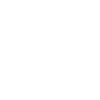

In [28]:
size2 = 100
display(Image.fromarray(np.ones((100,100), np.uint8)*255))

In [82]:
def get_grey_img(source=IMG_DEFAULT1):
    img = cv2.imread(source)
    g_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return g_img

In [83]:
g_img1 = get_grey_img()

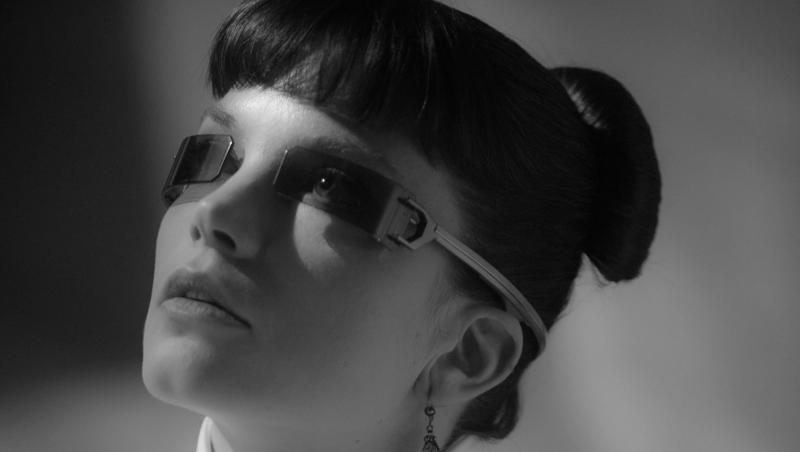

In [84]:
display(Image.fromarray(g_img1))

In [86]:
g_img1.max()

241

In [97]:
def LoG(g_img):
    conv_x = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]])
    
    g_img = cv2.GaussianBlur(g_img, (3, 3), 0)
    img = g_img.astype('float64')
    '''
    vertical = ndimage.convolve(img, conv_x)
    horizontal = ndimage.convolve(img, conv_x)

    edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))

    return edged_img
    '''
    return ndimage.convolve(img, conv_x)

In [98]:
LoG_img = LoG(g_img1)

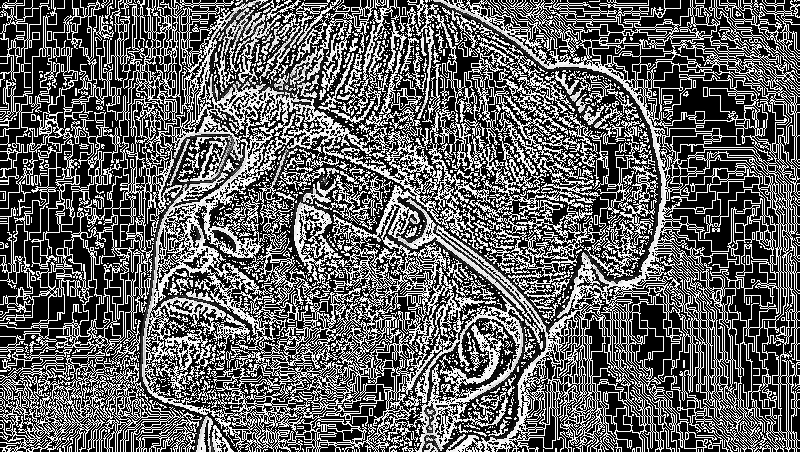

In [94]:
display(Image.fromarray(LoG_img))

In [100]:
LoG_img

array([[ 0.,  0.,  0., ..., -2., -3., -3.],
       [ 0.,  0.,  0., ...,  4.,  3.,  3.],
       [ 0.,  0.,  1., ...,  3.,  1.,  0.],
       ...,
       [ 0.,  1.,  4., ...,  3.,  0.,  0.],
       [ 0.,  2., -4., ...,  3.,  0.,  0.],
       [ 0.,  3., -3., ...,  3.,  0.,  0.]])

In [99]:
print(LoG_img.max())
print(LoG_img.min())

168.0
-410.0


In [121]:
d = 0.08 * LoG_img.max()
print(d)

13.44


In [118]:
def find_zero_cross(LoG_img, d):
    width, height = LoG_img.shape
    tem_img = np.zeros((width+2, height+2), np.float32)
    for i in range(1, width+1):
        for j in range(1, height+1):
            tem_img[i,j] = LoG_img[i-1,j-1]
    res_img = np.zeros((width, height), np.uint8)
    border_cond = 0
    for i in range(1, width+1):
        for j in range(1, height+1):
            if tem_img[i-1,j] * tem_img[i+1,j] < 0:
                if abs(tem_img[i-1,j] - tem_img[i+1,j]) >= d:
                    border_cond += 1
            if tem_img[i,j-1] * tem_img[i,j+1] < 0:
                if abs(tem_img[i,j-1] - tem_img[i,j+1]) >= d:
                    border_cond += 1
            if tem_img[i+1,j+1] * tem_img[i-1,j-1] < 0:
                if abs(tem_img[i+1,j+1] - tem_img[i-1,j-1]) >= d:
                    border_cond += 1
            if tem_img[i-1,j+1] * tem_img[i+1,j-1] < 0:
                if abs(tem_img[i-1,j+1] - tem_img[i+1,j-1]) >= d:
                    border_cond += 1
            
            if border_cond > 1:
                res_img[i-1,j-1] = 255
            border_cond = 0
    return res_img



In [122]:
res_img_LoG = find_zero_cross(LoG_img, d)

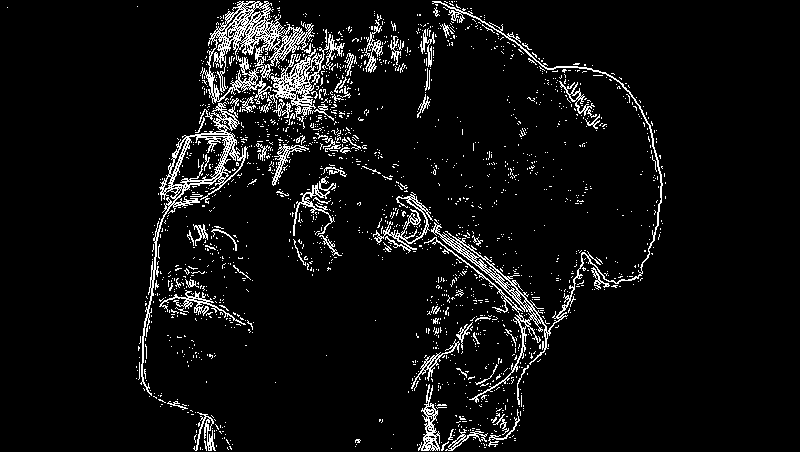

In [123]:
display(Image.fromarray(res_img_LoG))